findfont: Font family ['MS Reference Specialty'] not found. Falling back to DejaVu Sans.


Friday's Total Utility: 41.4588894408741
Initial Mass of the Crusonia Plant: 100.0
 Period  Consumption
    1.0     5.000000
    2.0     5.250000
    3.0     5.512500
    4.0     5.788125
    5.0     6.077531
    6.0     6.381408
    7.0     6.700478
    8.0     7.035502
    9.0     7.387277
   10.0     7.756641
   11.0     8.144473
   12.0     8.551697
   13.0     8.979282
   14.0     9.428246
   15.0     9.899658
   16.0    10.394641
   17.0    10.914373
   18.0    11.460092
   19.0    12.033096
   20.0    12.634751


findfont: Font family ['MS Reference Sans Serif'] not found. Falling back to DejaVu Sans.


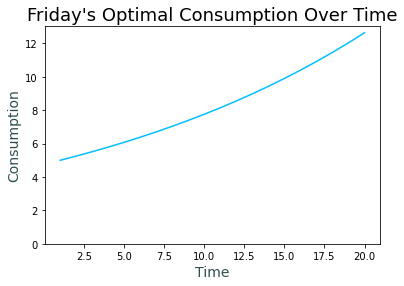

In [1]:
#N-Period Crusonia Model
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

t = int(input("Enter the number of time periods, t:")) 

#Coefficients
c0 = float(input("Enter the initial size of the Crusonia plant, c0:"))  #The Crusonia plant's initial size
ß = float(input("Enter Friday's discount factor, ß, generally it is assumed that 0<ß≤1:"))  #The factor by which Friday discounts the urgency of future demands
π = float(input("Enter the rate at which the Crusonia plant grows, π, if π<1 the Crusonia plant decays over time and if π>1 it grows over time:")) #The rate at which the Crusonia plant grows

#Solving for the Optimal Consumption Path
i, j = np.meshgrid(np.arange(t), np.arange(t))
a = ((1/((ß**j)*(π**j)))*1)*sum([ß**(x-1) for x in range(1, t+1)])
A = np.diag(np.diag(a))
b =  np.full((t, 1), c0)

x = np.linalg.solve(A, b)


#Creating a Vector for Time Periods
k, l = np.meshgrid(np.arange(1), np.arange(t))
time = (l+1)

#Finding the Total Utility:
log = np.log(x) #Friday's utility can be decomposed across each period and it is described by the natural logarithm of his consumption that period
m, n = np.meshgrid(np.arange(t), np.arange(t))
z = ((((ß**(k))*1**n))) 
discount = np.diag(np.diag(z))
c = np.multiply(log, discount)
util = np.sum(c)
print("Friday's Total Utility:", util)
print('Initial Mass of the Crusonia Plant:', c0)

nperioddf = pd.DataFrame(data=np.column_stack((time,x)),columns=['Period','Consumption'])
print(nperioddf.to_string(index=False))

plt.plot(time, x, color = 'deepskyblue')

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}
plt.ylim(ymin=0) 

plt.xlabel("Time", fontdict = font1)
plt.ylabel("Consumption", fontdict = font1)
plt.title("Friday's Optimal Consumption Over Time", fontdict = font2)

plt.show()

In [73]:
print("The product of Friday's discount factor and his Crusonia plant's productivity:",ß*π)

def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))

income = c0/(sigma_sum(1, t+1,lambda i: π**(1-i) ))
print("Friday's income is:",income)

The product of Friday's discount factor and his Crusonia plant's productivity: 1.0185
Friday's income is: 4.798394101858203


In [70]:
nperioddf

,Period,Consumption
0,1.0,3.149780
1,2.0,3.208051
2,3.0,3.267400
3,4.0,3.327847
4,5.0,3.389412
...,...,...
95,96.0,17.971254
96,97.0,18.303722
97,98.0,18.642341
98,99.0,18.987224


In [71]:
 print(nperioddf['Consumption'])

0      3.149780
1      3.208051
2      3.267400
3      3.327847
4      3.389412
        ...    
95    17.971254
96    18.303722
97    18.642341
98    18.987224
99    19.338488
Name: Consumption, Length: 100, dtype: float64


In [72]:
dftest = nperioddf.to_string(index=False)
